#### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# 1. What percentage of all licensed sets ever released were Star Wars themed?


In [9]:
original_df = pd.read_csv('lego_sets.csv')
original_df.info()
theme = pd.read_csv('parent_theme.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11986 entries, 0 to 11985
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   set_num       11833 non-null  object 
 1   name          11833 non-null  object 
 2   year          11986 non-null  int64  
 3   num_parts     6926 non-null   float64
 4   theme_name    11833 non-null  object 
 5   parent_theme  11986 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 562.0+ KB


#### Removed rows with no set_num


In [3]:
new_df = original_df.dropna(subset = ["set_num"])   
print(new_df) 

             set_num                                               name  year  \
0               00-1                                    Weetabix Castle  1970   
1             0011-2                                  Town Mini-Figures  1978   
2             0011-3                         Castle 2 for 1 Bonus Offer  1987   
3             0012-1                                 Space Mini-Figures  1979   
4             0013-1                                 Space Mini-Figures  1979   
...              ...                                                ...   ...   
11828    Wauwatosa-1  LEGO Store Grand Opening Exclusive Set, Mayfai...  2012   
11829   WHITEHOUSE-1                                  Micro White House  2015   
11830    Wiesbaden-1  LEGO Store Grand Opening Exclusive Set, Wiesba...  2010   
11831  WishingWell-1                     Wishing Well [Toys R Us Promo]  2013   
11832        wwgp1-1                Wild West Limited Edition Gift Pack  1996   

       num_parts        the

#### Remove Rows with no theme


In [4]:
df = new_df.dropna(subset = ["parent_theme"])  
df

,set_num,name,year,num_parts,theme_name,parent_theme
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland
1,0011-2,Town Mini-Figures,1978,NaN,Supplemental,Town
2,0011-3,Castle 2 for 1 Bonus Offer,1987,NaN,Lion Knights,Castle
3,0012-1,Space Mini-Figures,1979,12.0,Supplemental,Space
4,0013-1,Space Mini-Figures,1979,12.0,Supplemental,Space
...,...,...,...,...,...,...
11828,Wauwatosa-1,"LEGO Store Grand Opening Exclusive Set, Mayfai...",2012,15.0,LEGO Brand Store,LEGO Brand Store
11829,WHITEHOUSE-1,Micro White House,2015,NaN,Promotional,Promotional
11830,Wiesbaden-1,"LEGO Store Grand Opening Exclusive Set, Wiesba...",2010,146.0,LEGO Brand Store,LEGO Brand Store
11831,WishingWell-1,Wishing Well [Toys R Us Promo],2013,NaN,Friends,Friends


#### Merge the two sets on parent_them and name


In [10]:
merged_df = df.merge(theme, left_on="parent_theme", right_on="name")

merged = merged_df.drop(columns="name_y")
merged.head()

,set_num,name_x,year,num_parts,theme_name,parent_theme,id,is_licensed
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland,411,False
1,00-2,Weetabix Promotional House 1,1976,NaN,Building,Legoland,411,False
2,00-3,Weetabix Promotional House 2,1976,NaN,Building,Legoland,411,False
3,00-4,Weetabix Promotional Windmill,1976,126.0,Building,Legoland,411,False
4,00-7,Weetabix Promotional Lego Village,1976,NaN,Building,Legoland,411,False


#### Licensed dataset


In [11]:
licensed = merged[merged['is_licensed']]
licensed.head()

,set_num,name_x,year,num_parts,theme_name,parent_theme,id,is_licensed
3493,10018-1,Darth Maul,2001,1868.0,Star Wars,Star Wars,158,True
3494,10019-1,Rebel Blockade Runner - UCS,2001,NaN,Star Wars Episode 4/5/6,Star Wars,158,True
3495,10026-1,Naboo Starfighter - UCS,2002,NaN,Star Wars Episode 1,Star Wars,158,True
3496,10030-1,Imperial Star Destroyer - UCS,2002,3115.0,Star Wars Episode 4/5/6,Star Wars,158,True
3497,10123-1,Cloud City,2003,707.0,Star Wars Episode 4/5/6,Star Wars,158,True


#### Calculate percentage of "the_force"

In [21]:
the_force = licensed.parent_theme.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
# if you add ['Star Wars'] it will only show the number for the specific value
# the_force = licensed.parent_theme.value_counts(normalize=True).mul(100).round(1).astype(str)['Star Wars']+'%'
the_force

Star Wars                           51.7%
Super Heroes                        20.5%
Harry Potter                         5.7%
The Hobbit and Lord of the Rings     3.4%
Minecraft                            2.5%
Disney Princess                      2.5%
Cars                                 2.3%
Teenage Mutant Ninja Turtles         1.8%
Indiana Jones                        1.6%
Pirates of the Caribbean             1.4%
Toy Story                            1.3%
SpongeBob SquarePants                1.2%
The Lone Ranger                      0.7%
Jurassic World                       0.6%
Scooby-Doo                           0.5%
Disney's Mickey Mouse                0.5%
Prince of Persia                     0.5%
Angry Birds                          0.5%
Ben 10                               0.5%
Avatar                               0.2%
Disney                               0.1%
Ghostbusters                         0.1%
Name: parent_theme, dtype: object

##### Plot visuals for "Management"

<AxesSubplot:title={'center':'Percentages of lego sets'}>

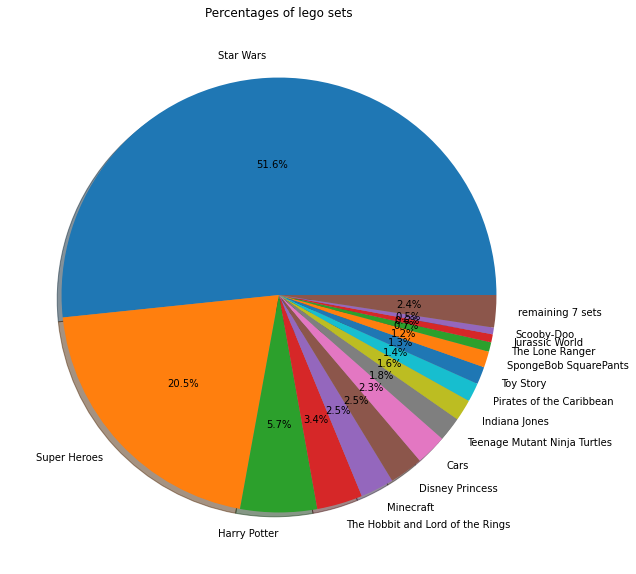

In [14]:
temp = licensed.parent_theme.value_counts(normalize=True).mul(100).round(1)
temp2 = temp.head(15)
if len(temp) > 15:
    temp2['remaining {0} sets'.format(len(temp) - 15)] = sum(temp[15:])
temp2.plot(kind='pie', shadow = True, figsize=(15,10), autopct='%1.1f%%', title = 'Percentages of lego sets', ylabel='')


# 2. In which year was Star Wars not the most popular licensed theme (in terms of nr. of sets released per year)? 

In [50]:
#licensed['count']= 1

df = licensed.groupby(['year' , 'parent_theme']).sum().reset_index()
max_df = df.sort_values('is_licensed', ascending=False).drop_duplicates(['year'])

max_df.sort_values('year', inplace=True)
max_df

,year,parent_theme,num_parts,id,is_licensed,count
0,1999,Star Wars,1384.0,2054,13,13
2,2000,Star Wars,2580.0,4108,26,26
4,2001,Star Wars,2949.0,2212,14,14
6,2002,Star Wars,4735.0,4424,28,28
9,2003,Star Wars,6660.0,5056,32,32
12,2004,Star Wars,1659.0,3160,20,20
16,2005,Star Wars,4730.0,4424,28,28
20,2006,Star Wars,2769.0,1738,11,11
24,2007,Star Wars,11361.0,2528,16,16
28,2008,Star Wars,6865.0,3634,23,23


## 3. Which year had the most number of unique sets?

In [51]:
merged.head()

,set_num,name_x,year,num_parts,theme_name,parent_theme,id,is_licensed
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland,411,False
1,00-2,Weetabix Promotional House 1,1976,NaN,Building,Legoland,411,False
2,00-3,Weetabix Promotional House 2,1976,NaN,Building,Legoland,411,False
3,00-4,Weetabix Promotional Windmill,1976,126.0,Building,Legoland,411,False
4,00-7,Weetabix Promotional Lego Village,1976,NaN,Building,Legoland,411,False


In [60]:
merged['count'] = 1
sets=merged.groupby(['year']).sum().reset_index()[['year', 'count']]
sets.head(65)


,year,count
0,1950,7
1,1953,4
2,1954,14
3,1955,28
4,1956,12
...,...,...
60,2012,615
61,2013,593
62,2014,715
63,2015,670


#### Visualize Sets numbers


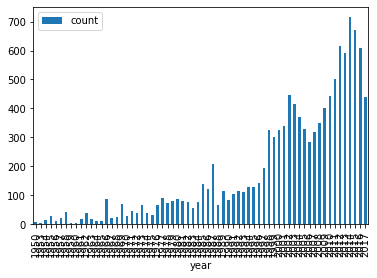

In [63]:
ax = sets.plot.bar(x='year', y='count', rot=90)